## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Identify the targets (outputs, y values, labels, predictions) for the model.
is_successful

Identify the features (input values, x values, attributes model uses for predictions) for your model.
application_type, affiliation, use_case, income_amt, ask_amt

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
drop_columns = ['EIN', 'NAME']
application_df.drop(drop_columns, axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
cutoff = 500
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = app_type_counts[app_type_counts < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts_above1 = class_counts[class_counts > 1]
class_counts_above1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
cutoff = 200
class_type_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = class_type_counts[class_type_counts < cutoff].index.tolist()

for cls in classifications_to_replace:
     application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: count, dtype: int64


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS' ])
application_df.head(10)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
5,1,5000,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1,31452,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
7,1,7508025,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8,1,94389,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
9,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop(columns=['IS_SUCCESSFUL'])
y = application_df['IS_SUCCESSFUL']


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=8, input_dim=X_train.shape[1], activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 368       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 419 (1.64 KB)
Trainable params: 419 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 0.6085 - accuracy: 0.6941
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5720 - accuracy: 0.7206
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5638 - accuracy: 0.7254
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5607 - accuracy: 0.7262
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5581 - accuracy: 0.7262
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5559 - accuracy: 0.7276
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5542 - accuracy: 0.7292
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5524 - accuracy: 0.7285
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5515 - accuracy: 0.7283
Epoch 10/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7306

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5556 - accuracy: 0.7272 - 472ms/epoch - 2ms/step
Loss: 0.5555600523948669, Accuracy: 0.7272303104400635


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#evaluate model performance
y_pred = nn.predict(X_test_scaled)

268/268 [==============================] - 0s 1ms/step


In [25]:
#convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      4037
           1       0.72      0.80      0.76      4538

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575



**In the classification report above:**


*  Accuracy is 73% which represents the percent of time the model accurately predicted the success of businesses funded by Alphabet Soup
*  Recall:
*  Precision:



In [26]:
#calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.781677646162595


The ROC-AUC Score of 0.78 means the model is performing relatively well (better than 50% which is pure guessing & close to 1.0 but at 0.78 still room to improve the model for better accuracy)

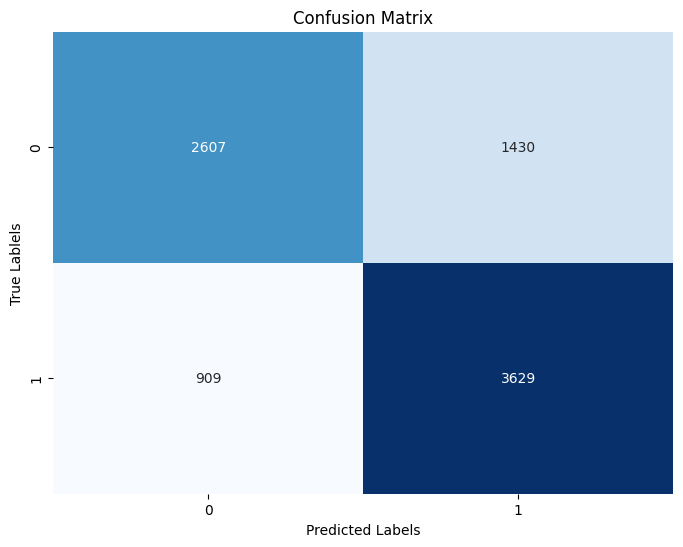

In [28]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Lablels")
plt.title("Confusion Matrix")
plt.show()

**In the confusion matrix above:**

* 1430 times where we predicted yes it was actually no.
*   3629 we predicted yes it was yes meaning our prediction was true? and that would be the number of businesses that were successful after being funded by Alpahbet Soup.
*   909 times we predicted no, but the actual was yes
*   2607 the model predicted no, and the actual was no meaing that the businesses were predicted to not be successful with funding from Alphabet Soup and that was actually true









In [29]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
model_file_path = ("C:/Users/miesb/OneDrive/Desktop/deep_learning_challenge")
nn.save(model_file_path)
print("model saved to:", model_file_path)

model saved to: C:/Users/miesb/OneDrive/Desktop/deep_learning_challenge
